In [1]:
#Must import pyphoon to use authors' code
from pyphoon2.DigitalTyphoonDataset import DigitalTyphoonDataset
from pyphoon2.DigitalTyphoonSequence import DigitalTyphoonSequence
from pyphoon2.DigitalTyphoonImage import DigitalTyphoonImage
from pyphoon2.DigitalTyphoonUtils import *
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [2]:
dataset_obj = DigitalTyphoonDataset("/data-2/common/geospatial/Typhoon/WP/image/", 
                                    "/data-2/common/geospatial/Typhoon/WP/metadata/", 
                                    "/data-2/common/geospatial/Typhoon/WP/metadata.json", 
                                    ('grade', 'lat','lng'), # labels to return when indexing 
                                    split_dataset_by='sequence',
                                    get_images_by_sequence=True,
                                    load_data_into_memory=False,
                                    ignore_list=[],
                                    verbose=True)

Processing metadata file at: /data-2/common/geospatial/Typhoon/WP/metadata.json
Initializing track data from: /data-2/common/geospatial/Typhoon/WP/metadata/
Initializing image_arrays from: /data-2/common/geospatial/Typhoon/WP/image/


/home/jaysh/.conda/envs/typhoon_env/lib/python3.9/site-packages/pyphoon2/DigitalTyphoonSequence.py:98: UserWarning: Only 3 of 139 track entries have images.
  warnings.warn(f'Only {len(self.images)} of {self.num_track_entries} track entries have images.')
/home/jaysh/.conda/envs/typhoon_env/lib/python3.9/site-packages/pyphoon2/DigitalTyphoonSequence.py:98: UserWarning: Only 113 of 349 track entries have images.
  warnings.warn(f'Only {len(self.images)} of {self.num_track_entries} track entries have images.')
/home/jaysh/.conda/envs/typhoon_env/lib/python3.9/site-packages/pyphoon2/DigitalTyphoonSequence.py:98: UserWarning: Only 45 of 151 track entries have images.
  warnings.warn(f'Only {len(self.images)} of {self.num_track_entries} track entries have images.')
/home/jaysh/.conda/envs/typhoon_env/lib/python3.9/site-packages/pyphoon2/DigitalTyphoonSequence.py:98: UserWarning: Only 83 of 253 track entries have images.
  warnings.warn(f'Only {len(self.images)} of {self.num_track_entries} t

Indexing the dataset


(67, 512, 512)
(67, 3)


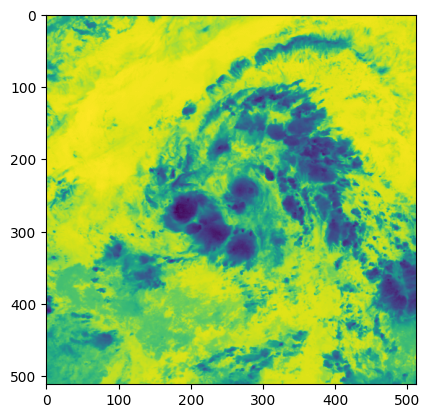

In [3]:
image_array, labels = dataset_obj[4] 
print(image_array.shape)
print(labels.shape)
plt.imshow(image_array[20])

In [4]:
train, test, val = dataset_obj.random_split([0.7, 0.15, 0.15], split_by='sequence')
trainloader = DataLoader(train, batch_size=1, shuffle=True)


Splitting the dataset into proportions [0.7, 0.15, 0.15], by sequence.


In [6]:
train_features, train_labels = next(iter(trainloader))
print(train_features.shape)
print(train_labels.shape)
#Labels are category of storm, and lat, long location

torch.Size([1, 184, 512, 512])
torch.Size([1, 184, 3])
